In [101]:
import warnings

warnings.filterwarnings('ignore')
from tensorflow.keras.datasets import mnist
warnings.filterwarnings('always')

In [102]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

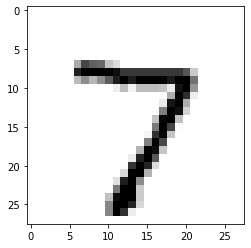

In [103]:
# A primeira do conjunto de teste é o sete:
import matplotlib.pyplot as plt
plt.imshow(test_images[0], cmap=plt.cm.binary)
plt.show()

In [104]:
# 60 mil matrizes de dimensões 28x28
train_images.shape

(60000, 28, 28)

In [105]:
# dizemos que o tensor train_images tem dimensão 3
# a primeira dimensão do tensor normelmente é a samples
# nesse caso: (samples, observações, features)
train_images.ndim

3

In [107]:
# recortado a imagem, parte de baixo à direita
sete_baixo_direira = test_images[0,14:,14:]
sete_baixo_direira.shape

(14, 14)

In [108]:
import matplotlib.pyplot as plt
plt.imshow(sete_baixo_direira, cmap=plt.cm.binary)
plt.show()

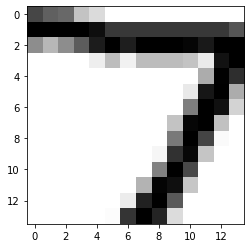

In [110]:
# recortado a imagem, centro da imagem:
import matplotlib.pyplot as plt
plt.imshow(test_images[0,7:-7,7:-7], cmap=plt.cm.binary)
plt.show()

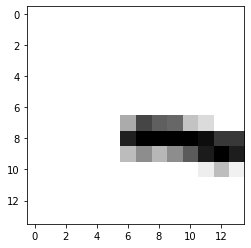

In [111]:
# recortado a imagem, esquerda, parte de cima
import matplotlib.pyplot as plt
plt.imshow(test_images[0,0:14,0:14], cmap=plt.cm.binary)
plt.show()

In [79]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax"),
])

model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [80]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [23]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 3ms/step - loss: 0.2509 - accuracy: 0.9281
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1037 - accuracy: 0.9693
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0680 - accuracy: 0.9796
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0505 - accuracy: 0.9851
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0377 - accuracy: 0.9891


In [81]:
# Predição para as 10 primeiras imagens do conjunto de teste
predictions = model.predict(test_images[0:10])

1/1 [==============================] - 0s 48ms/step


In [82]:
# Probabilidades para a primeira imagem do conjunto de teste
predictions[0]

array([0.09640526, 0.10888255, 0.13075899, 0.10083734, 0.13386565,
       0.1621421 , 0.05029514, 0.0647772 , 0.0770139 , 0.07502177],
      dtype=float32)

In [83]:
# Maior probabilidade é para o número 7
predictions[0].argmax()

5

In [84]:
# quando olhamos o label real, realmente é 7:
test_labels[0]

7

In [85]:
# cursto e Acurácia
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 2.4844 - accuracy: 0.1003


In [86]:
test_loss

2.4844019412994385

In [89]:
test_acc

0.10029999911785126

In [113]:
# batch número 5, sendo cada batch de tamanho 128
n = 5
batch5 = train_images[128*n:128*(n+1)]